## Background: HSV and RGB

![Color Space](https://upload.wikimedia.org/wikipedia/commons/thumb/5/52/HSL-HSV_hue_and_chroma.svg/600px-HSL-HSV_hue_and_chroma.svg.png "Trigram")

Given an HSV color with hue $ H \in [0^\circ, 360^\circ) $, saturation $ S_V \in [0, 1] $, and value $ V \in [0, 1] $, we can use the same strategy. First, we find chroma:

$$
C = V \times S_V 
$$

### Hue and Chroma

![Hue and Chroma](https://upload.wikimedia.org/wikipedia/commons/thumb/3/33/Hsv-hexagons-to-circles.svg/1480px-Hsv-hexagons-to-circles.svg.png "Polarize")


Then we can find a point $ (R_1, G_1, B_1) $ along the bottom three faces of the RGB cube, with the same hue and chroma as our color (using the intermediate value $ X $ for the second largest component of this color):

$$
H' = \frac{H}{60^\circ} 
$$

$$
X = C \times (1 - |H' \mod 2 - 1|) 
$$


### RGB Activation

![RGB Activation](https://upload.wikimedia.org/wikipedia/commons/thumb/5/5d/HSV-RGB-comparison.svg/600px-HSV-RGB-comparison.svg.png "Unify")

$$
(R_1, G_1, B_1) = \begin{cases} 
(C, X, 0) & \text{if } 0 \leq H' < 1 \\
(X, C, 0) & \text{if } 1 \leq H' < 2 \\
(0, C, X) & \text{if } 2 \leq H' < 3 \\
(0, X, C) & \text{if } 3 \leq H' < 4 \\
(X, 0, C) & \text{if } 4 \leq H' < 5 \\
(C, 0, X) & \text{if } 5 \leq H' < 6 \\
\end{cases}
$$

Finally, we can find $ R, G, $ and $ B $ by adding the same amount to each component, to match value:

$$
m = V - C 
$$

$$
(R, G, B) = (R_1 + m, G_1 + m, B_1 + m) 
$$

## Rotating Ring

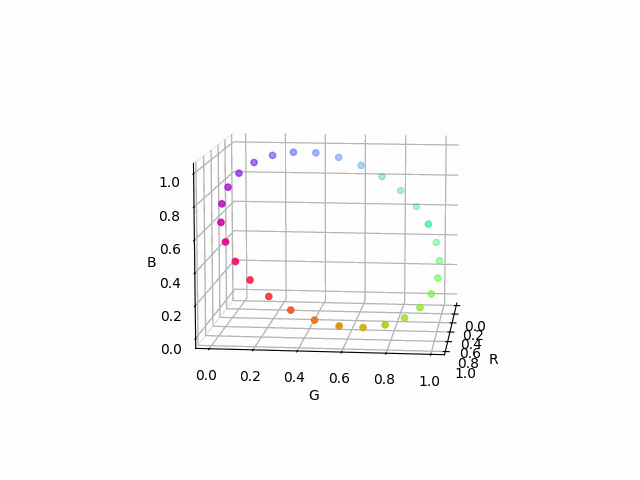

In [1]:
import jax
import jax.numpy as jnp
from celluloid import Camera
import matplotlib.pyplot as plt
from matplotlib.animation import PillowWriter
from IPython.display import Image
# Function to generate points on the circle
def sample_points_on_circle(a, num_samples):
    # Circle parameters
    center = jnp.array([1, 1, 1]) / 2
    radius = 0.6
    normal_vector = jnp.array([1, 1, 1])
    normal_vector = normal_vector / jnp.linalg.norm(normal_vector)

    # angles = jax.random.uniform(key, (num_samples,), minval=0, maxval=2 * jnp.pi)
    angles = jnp.linspace(0,2 * jnp.pi,num_samples)+a
    x = radius * jnp.cos(angles)
    y = radius * jnp.sin(angles)
    
    # Create a local coordinate system on the plane of the circle
    if normal_vector[0] == 0 and normal_vector[1] == 0:
        u = jnp.array([1, 0, 0])
    else:
        u = jnp.array([-normal_vector[1], normal_vector[0], 0])
    u = u / jnp.linalg.norm(u)
    v = jnp.cross(normal_vector, u)
    
    points = center + jnp.outer(x, u) + jnp.outer(y, v)
    return points

a = 0
num_samples = 30  # Number of points to sample
frames = 20

fig = plt.figure()
camera = Camera(fig)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
colors0 = sample_points_on_circle(0., num_samples)
for a in jnp.linspace(0,2 * jnp.pi,frames):
    colors = sample_points_on_circle(a, num_samples)
    ax.view_init(elev=10, azim=a)
    ax.scatter(colors[:, 0], colors[:, 1], colors[:, 2], c=colors0, marker='o')
    camera.snap()

plt.close()

animation = camera.animate()
# from IPython.display import HTML
# HTML(animation.to_html5_video())
animation.save("rotating_ring.gif", writer=PillowWriter(fps=120))
plt.show()
Image(data=open("rotating_ring.gif", "rb").read(), format='png')

## Sphere

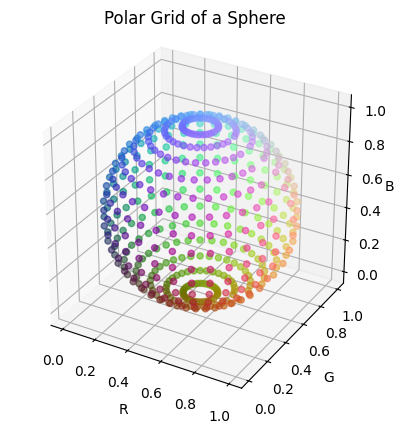

In [2]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Center and radius of the sphere
center = jnp.array([0., 0., 0.])
radius = 1.

# Generate spherical coordinates
phi = jnp.linspace(0, 2 * jnp.pi, 34)[1:-1]
theta = jnp.linspace(0, jnp.pi, 18)[1:-1]
phi, theta = jnp.meshgrid(phi, theta)

# Convert spherical coordinates to Cartesian coordinates
x = center[0] + radius * jnp.sin(theta) * jnp.cos(phi)
y = center[1] + radius * jnp.sin(theta) * jnp.sin(phi)
z = center[2] + radius * jnp.cos(theta)

sphere = jnp.stack((x, y, z), axis=-1)

# Convert JAX arrays to NumPy arrays for plotting
x_np = np.array(x)
y_np = np.array(y)
z_np = np.array(z)

# Create RGB colors based on the coordinates
# Normalize x, y, z to the range [0, 1] for RGB color
x_np = (x_np - x_np.min()) / (x_np.max() - x_np.min())
y_np = (y_np - y_np.min()) / (y_np.max() - y_np.min())
z_np = (z_np - z_np.min()) / (z_np.max() - z_np.min())

rgb = np.stack((x_np, y_np, z_np), axis=-1).reshape(-1, 3)

# Flatten the coordinate arrays for scatter plot
x_flat = x_np.flatten()
y_flat = y_np.flatten()
z_flat = z_np.flatten()

# Plot the sphere points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_flat, y_flat, z_flat, color=rgb, alpha=0.6)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
ax.set_title('Polar Grid of a Sphere')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

# Show the plot
plt.show()


### Rotated Sphere

Rotation matrix around the x-axis:
 [[ 1.          0.          0.        ]
 [ 0.          0.7071067  -0.70710677]
 [ 0.          0.70710677  0.7071067 ]]
Rotation matrix around the y-axis:
 [[ 0.7071067   0.          0.70710677]
 [ 0.          1.          0.        ]
 [-0.70710677  0.          0.7071067 ]]
Rotation matrix around the z-axis:
 [[ 0.7071067  -0.70710677  0.        ]
 [ 0.70710677  0.7071067   0.        ]
 [ 0.          0.          1.        ]]
Combined rotation matrix:
 [[ 0.5        -0.14637756  0.8534088 ]
 [ 0.5         0.8534088  -0.14637756]
 [-0.70703125  0.4998932   0.4998932 ]]


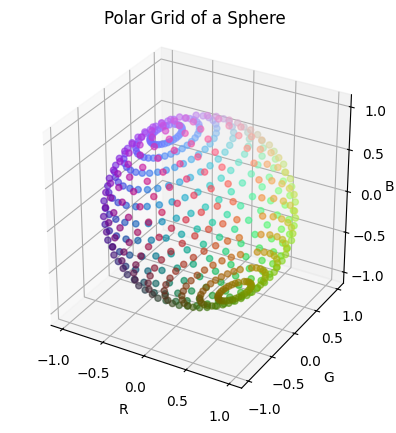

In [3]:
import jax.numpy as jnp

def rotation_matrix_x(angle):
    """Rotation matrix around the x-axis by a given angle in radians."""
    c, s = jnp.cos(angle), jnp.sin(angle)
    return jnp.array([[1, 0, 0],
                      [0, c, -s],
                      [0, s, c]])

def rotation_matrix_y(angle):
    """Rotation matrix around the y-axis by a given angle in radians."""
    c, s = jnp.cos(angle), jnp.sin(angle)
    return jnp.array([[c, 0, s],
                      [0, 1, 0],
                      [-s, 0, c]])

def rotation_matrix_z(angle):
    """Rotation matrix around the z-axis by a given angle in radians."""
    c, s = jnp.cos(angle), jnp.sin(angle)
    return jnp.array([[c, -s, 0],
                      [s, c, 0],
                      [0, 0, 1]])

# Example angles (in radians)
angle_x = jnp.pi / 4  # 45 degrees
angle_y = jnp.pi / 4  # 45 degrees
angle_z = jnp.pi / 4  # 45 degrees

# Compute rotation matrices
R_x = rotation_matrix_x(angle_x)
R_y = rotation_matrix_y(angle_y)
R_z = rotation_matrix_z(angle_z)

# Print rotation matrices
print("Rotation matrix around the x-axis:\n", R_x)
print("Rotation matrix around the y-axis:\n", R_y)
print("Rotation matrix around the z-axis:\n", R_z)

# Combine rotations
# Example: Rotate around x, then y, then z
rotation = R_z @ R_y @ R_x
print("Combined rotation matrix:\n", rotation)

rotated_sphere = sphere@rotation

# Plot the sphere points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rotated_sphere[:,:,0].flatten(), rotated_sphere[:,:,1].flatten(), rotated_sphere[:,:,2].flatten(), color=rgb, alpha=0.6)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
ax.set_title('Polar Grid of a Sphere')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

# Show the plot
plt.show()

## Hemi-Sphere

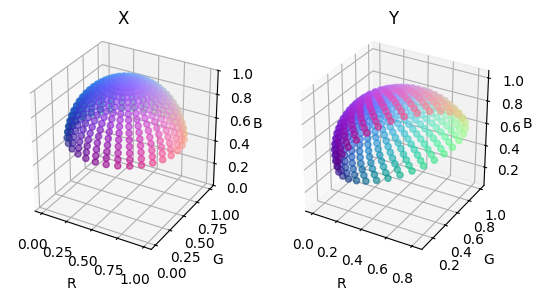

In [4]:
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

# Center and radius of the sphere
center = jnp.array([0., 0., 0.])
radius = 1.

# Generate spherical coordinates
phi = jnp.linspace(0, 2 * jnp.pi, 33)[:-1]
theta = jnp.linspace(0, jnp.pi/2, 17)[:-1]
phi, theta = jnp.meshgrid(phi, theta)

# Convert spherical coordinates to Cartesian coordinates
x = center[0] + radius * jnp.sin(theta) * jnp.cos(phi)
y = center[1] + radius * jnp.sin(theta) * jnp.sin(phi)
z = center[2] + radius * jnp.cos(theta)

points = jnp.stack((x, y, z), axis=-1)

# Convert JAX arrays to NumPy arrays for plotting
x_np = np.array(x)
y_np = np.array(y)
z_np = np.array(z)

# Create RGB colors based on the coordinates
# Normalize x, y, z to the range [0, 1] for RGB color
x_np = (x_np + 1) / 2
y_np = (y_np + 1) / 2
z_np = (z_np + 1) / 2

rgb = np.stack((x_np, y_np, z_np), axis=-1).reshape(-1, 3)

# Flatten the coordinate arrays for scatter plot
x_flat = x_np.flatten()
y_flat = y_np.flatten()
z_flat = z_np.flatten()

# Plot the sphere points
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(x_flat, y_flat, z_flat, color=rgb, alpha=0.6)
ax.set_zlim(0,1)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
ax.set_title('X')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

rotated_points = (points@rotation + 1) / 2

ax = fig.add_subplot(122, projection='3d')
ax.scatter(rotated_points[:,:,0].flatten(), rotated_points[:,:,1].flatten(), rotated_points[:,:,2].flatten(), color=rgb, alpha=0.6)

ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
ax.set_title('Y')

# Set the aspect ratio to be equal
ax.set_box_aspect([1, 1, 1])

# Show the plot
plt.show()

## Cube

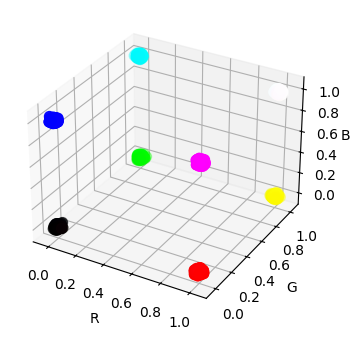

In [5]:
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt

def generate_clustered_data(key, num_samples_per_cluster, std=0.01):
    # Define centers of the clusters
    centers_X = jnp.array([
        [0,   0,   0  ],
        [1.0, 0.0, 0.0],
        [0.0, 1.0, 0.0],
        [0.0, 0.0, 1.0]
    ])

    centers_Y = jnp.array([
        [1,   1,   1  ],
        [0.0, 1.0, 1.0],
        [1.0, 0.0, 1.0],
        [1.0, 1.0, 0.0]
    ])
    num_clusters = len(centers_X)
    X_list = []
    Y_list = []

    for i in range(num_clusters):
        key, subkey = jax.random.split(key) # IID
        X_cluster = jax.random.normal(key, (num_samples_per_cluster, len(centers_X[0]))) * std + centers_X[i]
        Y_cluster = jax.random.normal(subkey, (num_samples_per_cluster, len(centers_Y[0]))) * std + centers_Y[i]
        X_list.append(X_cluster)
        Y_list.append(Y_cluster)

    X = jnp.concatenate(X_list, axis=0)
    Y = jnp.concatenate(Y_list, axis=0)
    return X, Y

# Generate data
key = jax.random.PRNGKey(0)
num_samples_per_cluster = 333 
X, Y = generate_clustered_data(key, num_samples_per_cluster)

# Plot the points
fig = plt.figure(figsize=(10,4))
def vis(ax,X):
    # Normalize color values to be between 0 and 1
    colors = jnp.minimum(jnp.maximum(X, 0), 1)

    # Use 'c' argument for color mapping
    sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=colors, s=50)

    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B',labelpad=-1.)

ax = fig.add_subplot(121, projection='3d')
vis(ax,X)
# ax = fig.add_subplot(122, projection='3d')
vis(ax,Y)
plt.show()



## Choose Your Data®️

In [6]:

# Function to create batches
def data_loader(X, Y, batch_size):
    dataset_size = len(X)
    indices = np.arange(dataset_size)
    while True:
        np.random.shuffle(indices)
        for start_idx in range(0, dataset_size, batch_size):
            end_idx = start_idx + batch_size
            if end_idx > dataset_size:
                break
            batch_indices = indices[start_idx:end_idx]
            yield {"X": X[batch_indices], "Y": Y[batch_indices]}

X, Y = points.reshape((-1,3)), rotated_points.reshape((-1,3))
data = data_loader(X, Y, batch_size=64)
# data = data_loader(sphere.reshape((-1,3)), rotated_sphere.reshape((-1,3)), batch_size=64)


### Setup Training

In [7]:
import jax
import jax.numpy as jnp
import flax
from flax import linen as nn
from flax.training import train_state
from flax.training.common_utils import shard
from tqdm.auto import tqdm
import optax


def plot_losses(losses, label='Training Loss', title='Loss Curve'):
    plt.plot(losses, label=label)
    plt.xlabel('Step')
    plt.ylabel('Loss')
    plt.title(title)
    plt.legend()
    plt.grid(True)


def train(model, data, num_iters = 1000):
    key = jax.random.PRNGKey(0)
    batch = next(data)
    params = model.init(key, batch['X'])['params']

    def weight_decay_mask(params):
        return {k: 'bias' not in k and 'scale' not in k for k in params.keys()}

    tx = optax.adamw(0.01, 0., mask=weight_decay_mask(params))
    state = train_state.TrainState.create(apply_fn=model.apply, params=params, tx=tx)

    # Replicate the state for distributed training
    state = flax.jax_utils.replicate(state)

    # Define a training step
    def train_step(state, batch):
        def loss_fn(params):
            out = state.apply_fn({'params': params}, batch['X'])
            loss = jnp.mean((out - batch['Y'])**2)
            return loss
        grad_fn = jax.value_and_grad(loss_fn)
        loss, grad = grad_fn(state.params)
        new_state = state.apply_gradients(grads=grad)
        metrics = {'loss': loss}
        return new_state, metrics

    # Parallelize training step
    train_step = jax.pmap(train_step, axis_name='batch', donate_argnums=(0,))

    # Training loop
    pbar = range(num_iters)
    if jax.process_index() == 0:
        pbar = tqdm(pbar)

    losses = []
    for step in pbar:
        batch = next(data)
        batch = shard(batch)
        state, metrics = train_step(state, batch)
        if jax.process_index() == 0:
            metrics = jax.device_get(flax.jax_utils.unreplicate(metrics))
            pbar.set_postfix(metrics)
            losses.append(metrics['loss'].item())
    
    return state, losses


##################################
# Conic Activation
##################################
import functools

@functools.partial(jax.jit, static_argnames=['channel_axis','variant','eps','num_groups','share_axis'])
def colu(input: jnp.ndarray, 
         channel_axis: int = -1, 
         variant: str = "soft", 
         eps: float = 1e-7, 
         num_groups: int = 1, 
         share_axis: bool = False
         ):
    """project the input x onto the axes dimension"""
    """output dimension = S = axes + cone sections = [len=(G or 1)] + G * [len=(S-1)]"""
    if num_groups == 0: # trivial case
        return input
    num_channels = input.shape[channel_axis]
    if (share_axis and num_groups == num_channels - 1) or (not share_axis and num_groups * 2 == num_channels): # pointwise case
        return nn.silu(input) if variant == "soft" else nn.relu(input)
    group_size = (num_channels - 1) // num_groups + 1 if share_axis else num_channels // num_groups
        
    # y = axes, x = cone sections
    if share_axis:
        assert (num_channels - 1) % num_groups == 0, "Channel size must be a multiple of number of cones plus one"
        y, x = jnp.split(input, [1], axis=channel_axis)
    else:
        assert num_channels % num_groups == 0, "Channel size must be a multiple of number of cones"
        y, x = jnp.split(input, [num_groups], axis=channel_axis)
        group_size = num_channels // num_groups # S = C / G

    assert channel_axis < 0, "channel_axis must be negative" # Comply with broadcasting on first dimensions
    x_old_shape = x.shape
    y_old_shape = y.shape
    x_shape = x.shape[:channel_axis] + (num_groups, group_size - 1) # NG(S-1)
    if share_axis:
        y_shape = y.shape[:channel_axis] + (1, 1) # N11
    else: 
        y_shape = y.shape[:channel_axis] + (num_groups, 1) # NG1
    if channel_axis < -1:
        x_shape += x.shape[(channel_axis+1):] # NGSHW if channel_axis = -3
        y_shape += y.shape[(channel_axis+1):] # NG1HW
    x = x.reshape(x_shape)
    y = y.reshape(y_shape)
    xn = jnp.linalg.norm(x,axis=channel_axis,keepdims=True) # NG1HW
    
    mask = y / (xn + eps) # NG1HW
    if variant == "sqrt":
        mask = jnp.sqrt(mask)
    elif variant == "log":
        mask = jnp.log(jnp.max(mask,0)+1)
    elif variant == "soft":
        mask = nn.sigmoid(mask - .5)
    elif variant == "hard":
        mask = mask.clip(0,1)
    else:
        raise NotImplementedError("variant must be soft or hard.")

    x = mask * x # NGSHW
    x = x.reshape(x_old_shape)
    y = y.reshape(y_old_shape)
    output = jnp.concatenate([y,x],axis=channel_axis)

    return output

@functools.partial(jax.jit, static_argnames=['scaling','eps'])
def rcolu_(x, scaling="constant",eps=1e-8):
    """x = w + v, v || e"""
    C = x.shape[-1]
    # e = jnp.ones(C) / jnp.sqrt(C)
    vn = jnp.sum(x,axis=-1,keepdims=True) / jnp.sqrt(C) # dot(x, e)
    v = jnp.repeat(vn,C,axis=-1) / jnp.sqrt(C) # outer(v, e)
    w = x - v
    wn = jnp.linalg.norm(w, axis=-1, keepdims=True)
    m = jnp.maximum(vn, 0.) / (wn + eps)
    m = jnp.minimum(m, 1.) 
    w_ = w * m # project onto cone
    x = v + w_
    
    return x

@functools.partial(jax.jit, static_argnames=['dim','num_groups','axis','scaling','eps'])
def rcolu(x,
          dim=4,
          num_groups=None,
          scaling='constant',
          axis=-1,
          eps=1e-7
          ):
    """dim=S, num_groups=S"""
    if len(x.shape) == 0:
        return x # edge case
    assert (dim is not None) ^ (num_groups is not None)
    x = jnp.moveaxis(x, axis, -1)
    shape = x.shape
    if dim is None:
        assert shape[-1] % num_groups == 0
        dim = shape[-1] // num_groups
    if num_groups is None:
        assert shape[-1] % dim == 0
        num_groups = shape[-1] // dim
    new_shape = x.shape[:-1] + (num_groups, dim)
    x = x.reshape(new_shape)
    x = rcolu_(x,scaling,eps)
    x = x.reshape(shape)
    x = jnp.moveaxis(x, -1, axis)
    return x

# # some test
# x = jnp.zeros(6).at[0].set(1)
# y = rcolu(x,dim=3)
# y.shape
# # some assertion 
# y1 = jnp.sum(y,axis=-1,keepdims=True) / jnp.sqrt(3) # dot(y, e)
# jnp.linalg.norm(y) / y1

##################################
# Hyperparameters
##################################
dim = 3
C = 3

### Linear

In [8]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.dim)
        # self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        # x = rcolu(x)
        # x = self.chi(x)
        return x

# Initialize the model and the optimizer
model = Model(dim=dim, C=C)

state, losses_linear = train(model, data, num_iters=2000)

plt.figure(figsize=(3,2))
plot_losses(losses_linear)

W, b = jax.device_get(flax.jax_utils.unreplicate((
                                                state.params['phi']['kernel'], 
                                                state.params['phi']['bias'],
                                                )))
U, S, VT = jax.numpy.linalg.svd(W)
W, S, b

  0%|          | 0/2000 [00:00<?, ?it/s]

### Linear(3,3) $\times$ Linear(3,3)

  0%|          | 0/2000 [00:00<?, ?it/s]

(array([[-0.87698036,  0.57265663, -0.23232311],
        [ 0.6821192 , -0.16004989, -0.38561252],
        [-0.11091907,  0.4141185 ,  0.819527  ]], dtype=float32),
 Array([1.3117417 , 0.9067104 , 0.32130206], dtype=float32),
 array([[ 0.11292776,  0.80494595,  0.02930438],
        [ 0.36591446,  1.0526348 ,  0.7557955 ],
        [-0.6006033 , -0.11898908, -0.07286599]], dtype=float32),
 Array([1.5512462 , 0.5513358 , 0.38021877], dtype=float32),
 array([[ 0.25004193, -0.07547954,  0.42404038],
        [ 0.25006577,  0.4264787 , -0.07287786],
        [-0.3532045 ,  0.24911694,  0.25002283]], dtype=float32),
 Array([0.4999574 , 0.49988845, 0.4972272 ], dtype=float32),
 array([0.49999818, 0.4999984 , 0.4999987 ], dtype=float32))

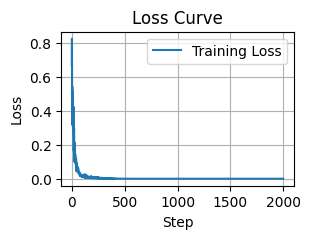

In [ ]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.C, use_bias=False)
        self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        # x = nn.relu(x)
        x = self.chi(x)
        return x

# Initialize the model and the optimizer
model = Model(dim=dim, C=C)

state, losses_2linear = train(model, data, num_iters = 2000)

plt.figure(figsize=(3,2))
plot_losses(losses_2linear)

params = jax.device_get(flax.jax_utils.unreplicate(state.params))
W0, W1, b1 = params['phi']['kernel'], params['chi']['kernel'], params['chi']['bias']

W = W0 @ W1

U0, S0, VT0 = jax.numpy.linalg.svd(W0)
U1, S1, VT1 = jax.numpy.linalg.svd(W1)
U, S, VT = jax.numpy.linalg.svd(W)
W0, S0, W1, S1, W, S, b

Note: weight_decay does not change much

### ReLU

  0%|          | 0/2000 [00:00<?, ?it/s]

(array([[-0.27788225,  0.45695433,  0.04547921],
        [ 0.53289884,  0.15036842, -0.17777835],
        [ 0.28522223,  0.22333093,  0.89114726]], dtype=float32),
 Array([0.965499  , 0.63531506, 0.46459582], dtype=float32),
 array([0.5040161 , 0.41929388, 0.0480411 ], dtype=float32),
 array([[ 0.07986831,  0.7067846 , -0.28518763],
        [ 0.6523976 ,  0.2719918 ,  0.7371523 ],
        [-0.59245884, -0.01881711,  0.18650149]], dtype=float32),
 Array([1.0670925 , 0.77995765, 0.51901376], dtype=float32),
 array([0.20445763, 0.01881007, 0.3249258 ], dtype=float32),
 Array([[ 0.24897003, -0.07286751,  0.42497396],
        [ 0.24617767,  0.41978025, -0.07361031],
        [-0.36008835,  0.24558449,  0.24991226]], dtype=float32),
 Array([0.5039617 , 0.49783638, 0.49066195], dtype=float32),
 array([0.49999818, 0.4999984 , 0.4999987 ], dtype=float32))

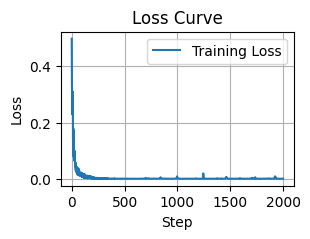

In [ ]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.C, use_bias=True)
        self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        x = nn.relu(x)
        x = self.chi(x)
        return x

# Initialize the model and the optimizer
model = Model(dim=dim, C=C)

state, losses_relu = train(model, data, num_iters = 2000)

plt.figure(figsize=(3,2))
plot_losses(losses_relu)

params = jax.device_get(flax.jax_utils.unreplicate(state.params))
W0, W1, b1 = params['phi']['kernel'], params['chi']['kernel'], params['chi']['bias']
b0 = params['phi']['bias']
W = jnp.matmul(W0,W1)

U0, S0, VT0 = jax.numpy.linalg.svd(W0)
U1, S1, VT1 = jax.numpy.linalg.svd(W1)
U, S, VT = jax.numpy.linalg.svd(W)
W0, S0, b0, W1, S1, b1, W, S, b

#### ReLU without Bias

  0%|          | 0/2000 [00:00<?, ?it/s]

(array([[-0.23551226,  0.23123421, -0.06567089],
        [ 0.19026531,  0.08572246, -0.34514   ],
        [ 1.1863635 ,  0.8736653 ,  1.2669599 ]], dtype=float32),
 Array([1.9463037, 0.3985504, 0.3239062], dtype=float32),
 array([[-0.15369987,  0.7731648 , -0.7077437 ],
        [ 0.7349959 ,  0.33416533,  1.0947394 ],
        [-0.6543573 , -0.72790533,  0.08359005]], dtype=float32),
 Array([1.5166359, 1.2517734, 0.2656015], dtype=float32),
 array([0.50505245, 0.49664783, 0.49025548], dtype=float32),
 Array([[ 0.24899006, -0.05719185,  0.4140811 ],
        [ 0.2607813 ,  0.42716217, -0.06951046],
        [-0.37005615,  0.2911377 ,  0.22310638]], dtype=float32),
 Array([0.52962303, 0.5102334 , 0.47188628], dtype=float32),
 array([0.49999818, 0.4999984 , 0.4999987 ], dtype=float32))

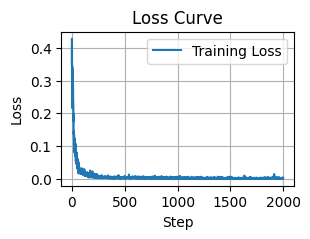

In [ ]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.C, use_bias=False)
        self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        x = nn.relu(x)
        x = self.chi(x)
        return x

# Initialize the model and the optimizer
model = Model(dim=dim, C=C)

state, losses_relu = train(model, data, num_iters = 2000)

plt.figure(figsize=(3,2))
plot_losses(losses_relu)

params = jax.device_get(flax.jax_utils.unreplicate(state.params))
W0, W1, b1 = params['phi']['kernel'], params['chi']['kernel'], params['chi']['bias']
W = jnp.matmul(W0,W1)

U0, S0, VT0 = jax.numpy.linalg.svd(W0)
U1, S1, VT1 = jax.numpy.linalg.svd(W1)
U, S, VT = jax.numpy.linalg.svd(W)
W0, S0, W1, S1, b1, W, S, b

Note: eigenvalues of the first layer: 2.7513304 , 0.6458238 , 0.52360034

Text(0.5, 0.92, 'Y')

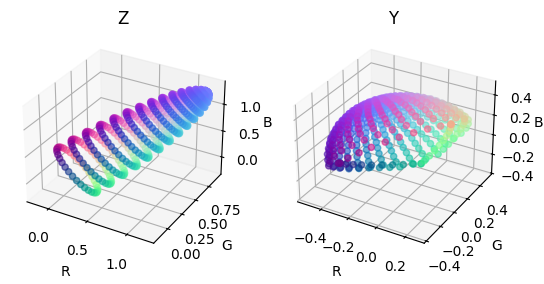

In [ ]:
rotated_points = points @ W0

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(rotated_points[:,:,0].flatten(), rotated_points[:,:,1].flatten(), rotated_points[:,:,2].flatten(), color=rgb, alpha=0.6)
# ax.set_zlim(0,1)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
ax.set_title('Z')

rotated_points = nn.relu(points @ W0) @ W1

ax = fig.add_subplot(122, projection='3d')
ax.scatter(rotated_points[:,:,0].flatten(), rotated_points[:,:,1].flatten(), rotated_points[:,:,2].flatten(), color=rgb, alpha=0.6)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
ax.set_title('Y')


### Conic

  0%|          | 0/2000 [00:00<?, ?it/s]

(array([[-0.30548552,  0.52505064,  0.07896388],
        [ 0.5615607 ,  0.1727749 , -0.30860305],
        [ 0.16451389,  0.19521594,  0.9340702 ]], dtype=float32),
 Array([1.010645  , 0.65900856, 0.5455621 ], dtype=float32),
 array([0.39672247, 0.41747206, 0.26210833], dtype=float32),
 array([[ 0.01266341,  0.72432464, -0.23975387],
        [ 0.5547151 ,  0.268136  ,  0.646792  ],
        [-0.53482103,  0.03960995,  0.14558192]], dtype=float32),
 Array([0.9338889 , 0.7578933 , 0.49242225], dtype=float32),
 array([0.35065722, 0.04185684, 0.25578076], dtype=float32),
 Array([[ 0.24416304, -0.07699537,  0.4241228 ],
        [ 0.26813126,  0.4405403 , -0.0679512 ],
        [-0.38920832,  0.2077465 ,  0.22307968]], dtype=float32),
 Array([0.53967154, 0.49909407, 0.46912435], dtype=float32),
 array([0.49999818, 0.4999984 , 0.4999987 ], dtype=float32))

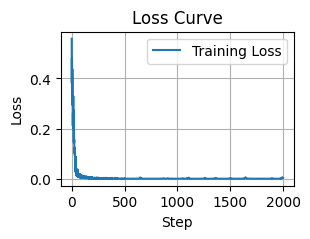

In [ ]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.C, use_bias=True)
        self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        x = rcolu(x, dim=dim)
        x = self.chi(x)
        return x

# Initialize the model and the optimizer
model = Model(dim=dim, C=C)

state, losses_colu = train(model, data, num_iters = 2000)

plt.figure(figsize=(3,2))
plot_losses(losses_colu)

params = jax.device_get(flax.jax_utils.unreplicate(state.params))
W0, W1, b1 = params['phi']['kernel'], params['chi']['kernel'], params['chi']['bias']
b0 = params['phi']['bias']
W = jnp.matmul(W0,W1)

U0, S0, VT0 = jax.numpy.linalg.svd(W0)
U1, S1, VT1 = jax.numpy.linalg.svd(W1)
U, S, VT = jax.numpy.linalg.svd(W)
W0, S0, b0, W1, S1, b1, W, S, b

### Conic without Bias

  0%|          | 0/2000 [00:00<?, ?it/s]

(array([[-0.1580884 ,  0.19701166, -0.08326223],
        [ 0.15391885,  0.03760724, -0.261914  ],
        [ 1.1090803 ,  1.0031329 ,  1.9628503 ]], dtype=float32),
 Array([2.4714296 , 0.28040877, 0.25878042], dtype=float32),
 array([0.39672247, 0.41747206, 0.26210833], dtype=float32),
 array([[ 0.07327099,  1.3110243 , -0.92365277],
        [ 0.99445707,  0.3199423 ,  1.3745774 ],
        [-0.7171218 , -0.76137114, -0.04407101]], dtype=float32),
 Array([1.8998383 , 1.7328956 , 0.20405579], dtype=float32),
 array([0.49525493, 0.4941527 , 0.49810812], dtype=float32),
 Array([[ 0.24492073, -0.08085442,  0.4207734 ],
        [ 0.23686218,  0.41391373, -0.07898045],
        [-0.33207703,  0.28268433,  0.26564217]], dtype=float32),
 Array([0.5192517 , 0.49846262, 0.46893942], dtype=float32),
 array([0.49999818, 0.4999984 , 0.4999987 ], dtype=float32))

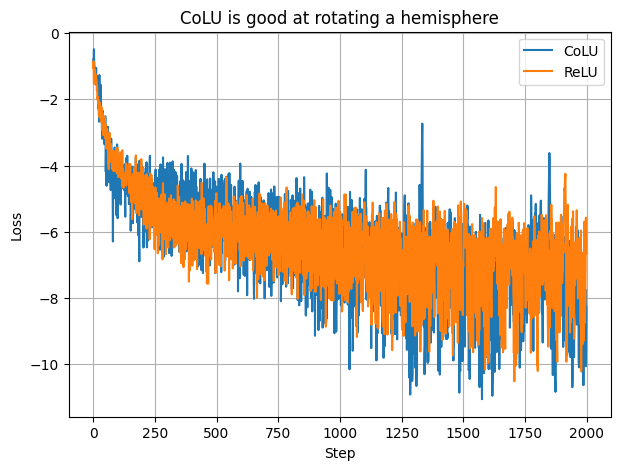

In [ ]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.C, use_bias=False)
        self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        x = rcolu(x, dim=C)
        x = self.chi(x)
        return x

# Initialize the model and the optimizer
model = Model(dim=dim, C=C)

state, losses_colu = train(model, data, num_iters = 2000)

plt.figure(figsize=(7,5))
plot_losses(jnp.log(jnp.array(losses_colu)),label="CoLU")
plot_losses(jnp.log(jnp.array(losses_relu)),label="ReLU",title="CoLU is good at rotating a hemisphere")

params = jax.device_get(flax.jax_utils.unreplicate(state.params))
W0, W1, b1 = params['phi']['kernel'], params['chi']['kernel'], params['chi']['bias']

W = jnp.matmul(W0,W1)

U0, S0, VT0 = jax.numpy.linalg.svd(W0)
U1, S1, VT1 = jax.numpy.linalg.svd(W1)
U, S, VT = jax.numpy.linalg.svd(W)
W0, S0, b0, W1, S1, b1, W, S, b

  0%|          | 0/2000 [00:00<?, ?it/s]

(array([[-0.15186135,  0.20323423, -0.08105829],
        [ 0.14516066,  0.0233169 , -0.2935996 ],
        [ 1.0550241 ,  1.0177773 ,  1.9471614 ]], dtype=float32),
 Array([2.4431722 , 0.28511918, 0.26220784], dtype=float32),
 array([0.39672247, 0.41747206, 0.26210833], dtype=float32),
 array([[ 0.07996738,  1.3242118 , -0.9327533 ],
        [ 0.9817013 ,  0.3342269 ,  1.3540628 ],
        [-0.75838816, -0.75472474, -0.10808128]], dtype=float32),
 Array([1.8950741 , 1.7496411 , 0.20684642], dtype=float32),
 array([0.485829  , 0.48617223, 0.49595764], dtype=float32),
 Array([[ 0.24838257, -0.07219315,  0.42550993],
        [ 0.25652742,  0.42077374, -0.07271862],
        [-0.39393616,  0.26513672,  0.17811203]], dtype=float32),
 Array([0.5424916 , 0.49788758, 0.4594858 ], dtype=float32),
 array([0.49999818, 0.4999984 , 0.4999987 ], dtype=float32))

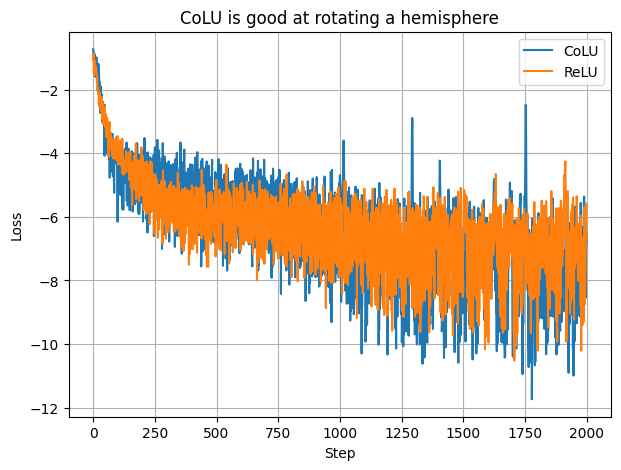

In [ ]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.C, use_bias=False)
        self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        x = rcolu(x, dim=C)
        x = self.chi(x)
        return x

# Initialize the model and the optimizer
model = Model(dim=dim, C=C)

state, losses_colu = train(model, data, num_iters = 2000)

plt.figure(figsize=(7,5))
plot_losses(jnp.log(jnp.array(losses_colu)),label="CoLU")
plot_losses(jnp.log(jnp.array(losses_relu)),label="ReLU",title="CoLU is good at rotating a hemisphere")

params = jax.device_get(flax.jax_utils.unreplicate(state.params))
W0, W1, b1 = params['phi']['kernel'], params['chi']['kernel'], params['chi']['bias']

W = jnp.matmul(W0,W1)

U0, S0, VT0 = jax.numpy.linalg.svd(W0)
U1, S1, VT1 = jax.numpy.linalg.svd(W1)
U, S, VT = jax.numpy.linalg.svd(W)
W0, S0, b0, W1, S1, b1, W, S, b

  0%|          | 0/2000 [00:00<?, ?it/s]

(array([[-0.15208188,  0.20817153, -0.09160671],
        [ 0.16545303,  0.03614424, -0.26796517],
        [ 1.1052319 ,  1.0085754 ,  2.055079  ]], dtype=float32),
 Array([2.5461102 , 0.28864   , 0.26732674], dtype=float32),
 array([0.39672247, 0.41747206, 0.26210833], dtype=float32),
 array([[ 0.12982984,  1.3190432 , -0.86294377],
        [ 0.9624443 ,  0.27605283,  1.3624884 ],
        [-0.7169228 , -0.73281705, -0.08401769]], dtype=float32),
 Array([1.8509097 , 1.718961  , 0.19402382], dtype=float32),
 array([0.48836327, 0.4904366 , 0.49321362], dtype=float32),
 Array([[ 0.24607468, -0.07644463,  0.42198563],
        [ 0.24847889,  0.42435646, -0.0708847 ],
        [-0.37090302,  0.21730042,  0.24581909]], dtype=float32),
 Array([0.5134533 , 0.49511907, 0.47723332], dtype=float32),
 array([0.49999818, 0.4999984 , 0.4999987 ], dtype=float32))

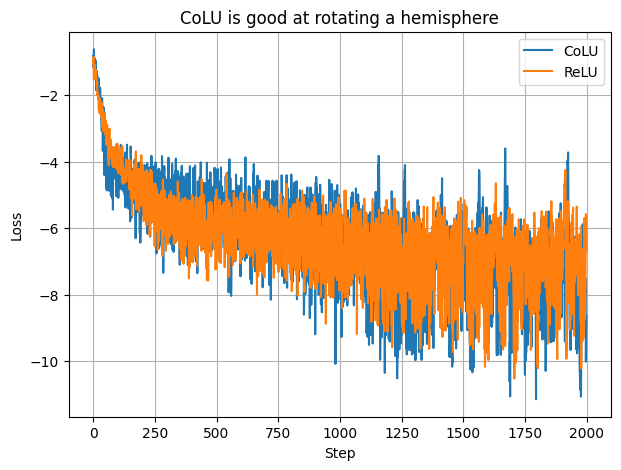

In [ ]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.C, use_bias=False)
        self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        x = rcolu(x, dim=C)
        x = self.chi(x)
        return x

# Initialize the model and the optimizer
model = Model(dim=dim, C=C)

state, losses_colu = train(model, data, num_iters = 2000)

plt.figure(figsize=(7,5))
plot_losses(jnp.log(jnp.array(losses_colu)),label="CoLU")
plot_losses(jnp.log(jnp.array(losses_relu)),label="ReLU",title="CoLU is good at rotating a hemisphere")

params = jax.device_get(flax.jax_utils.unreplicate(state.params))
W0, W1, b1 = params['phi']['kernel'], params['chi']['kernel'], params['chi']['bias']

W = jnp.matmul(W0,W1)

U0, S0, VT0 = jax.numpy.linalg.svd(W0)
U1, S1, VT1 = jax.numpy.linalg.svd(W1)
U, S, VT = jax.numpy.linalg.svd(W)
W0, S0, b0, W1, S1, b1, W, S, b

  0%|          | 0/2000 [00:00<?, ?it/s]

(array([[-0.14793026,  0.22148643, -0.04683691],
        [ 0.16562667,  0.05184862, -0.25679088],
        [ 1.1738032 ,  1.0253273 ,  1.98123   ]], dtype=float32),
 Array([2.522996 , 0.2927771, 0.2689804], dtype=float32),
 array([0.39672247, 0.41747206, 0.26210833], dtype=float32),
 array([[ 0.05405209,  1.2569778 , -0.8920967 ],
        [ 0.99481255,  0.3446384 ,  1.3286452 ],
        [-0.7239016 , -0.7917672 , -0.03089717]], dtype=float32),
 Array([1.8540246, 1.710851 , 0.1998593], dtype=float32),
 array([0.49822244, 0.4982235 , 0.49870938], dtype=float32),
 Array([[ 0.246732  , -0.07210541,  0.4271984 ],
        [ 0.2454114 ,  0.42949677, -0.07121491],
        [-0.3513527 ,  0.2522583 ,  0.25426674]], dtype=float32),
 Array([0.50578344, 0.49999067, 0.4942338 ], dtype=float32),
 array([0.49999818, 0.4999984 , 0.4999987 ], dtype=float32))

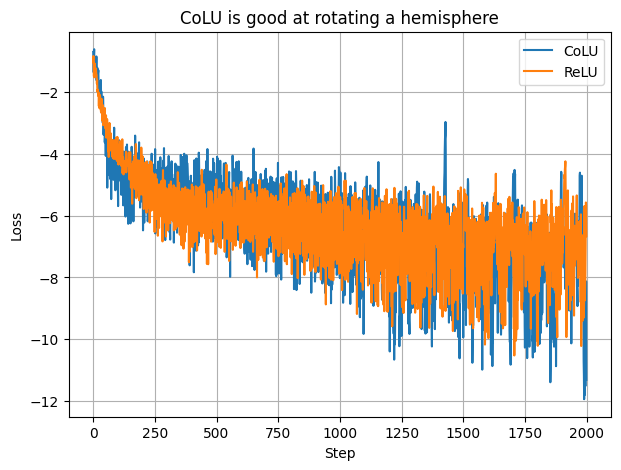

In [ ]:
# Define the model
class Model(nn.Module):
    dim: int = 3
    C: int = 3

    def setup(self):
        self.phi = nn.Dense(self.C, use_bias=False)
        self.chi = nn.Dense(self.dim)

    def __call__(self, x):
        x = self.phi(x)
        x = rcolu(x, dim=C)
        x = self.chi(x)
        return x

# Initialize the model and the optimizer
dim = 3
C = 3
model = Model(dim=dim, C=C)

state, losses_colu = train(model, data, num_iters = 2000)

plt.figure(figsize=(7,5))
plot_losses(jnp.log(jnp.array(losses_colu)),label="CoLU")
plot_losses(jnp.log(jnp.array(losses_relu)),label="ReLU",title="CoLU is good at rotating a hemisphere")

params = jax.device_get(flax.jax_utils.unreplicate(state.params))
W0, W1, b1 = params['phi']['kernel'], params['chi']['kernel'], params['chi']['bias']

W = jnp.matmul(W0,W1)

U0, S0, VT0 = jax.numpy.linalg.svd(W0)
U1, S1, VT1 = jax.numpy.linalg.svd(W1)
U, S, VT = jax.numpy.linalg.svd(W)
W0, S0, b0, W1, S1, b1, W, S, b

Note: eigenvalues of the first layer: 3.17133  , 0.5529797, 0.4568106

Text(0.5, 0.92, 'X')

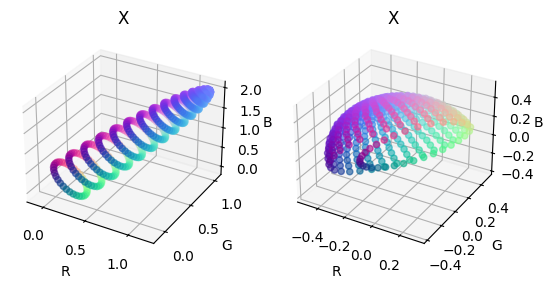

In [ ]:
rotated_points = points @ W0

fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.scatter(rotated_points[:,:,0].flatten(), rotated_points[:,:,1].flatten(), rotated_points[:,:,2].flatten(), color=rgb, alpha=0.6)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
ax.set_title('X')

rotated_points = rcolu(points @ W0, dim=C) @ W1

ax = fig.add_subplot(122, projection='3d')
ax.scatter(rotated_points[:,:,0].flatten(), rotated_points[:,:,1].flatten(), rotated_points[:,:,2].flatten(), color=rgb, alpha=0.6)
ax.set_xlabel('R')
ax.set_ylabel('G')
ax.set_zlabel('B',labelpad=-1.)
ax.set_title('X')

In [ ]:


fig = plt.figure()
plt.axis('off')
camera = Camera(fig)
ax = fig.add_subplot(111, projection='3d')
num_iters = 100
pbar = tqdm(range(num_iters))

def train_step(state, batch):
    def loss_fn(params):
        out = state.apply_fn({'params': params}, batch['X'])
        loss = jnp.mean((out - batch['Y'])**2)
        return loss
    grad_fn = jax.value_and_grad(loss_fn)
    loss, grad = grad_fn(state.params)
    new_state = state.apply_gradients(grads=grad)
    metrics = {'loss': loss}
    return new_state, metrics

train_step = jax.pmap(train_step)

for step in enumerate(pbar):
    batch = {'X': X, 'Y': Y}
    batch = flax.training.common_utils.shard(batch)
    state, metrics = train_step(state, batch)
    metrics = jax.device_get(flax.jax_utils.unreplicate(metrics))
    pbar.set_postfix(metrics)
    
    # Plot the surface

    param = jax.device_get(jnp.array(jnp.squeeze(state.params['phi']['kernel'][0])))
    
    # Perform SVD
    U, S, Vt = jax.numpy.linalg.svd(param)

    # Generate points on a unit sphere
    phi = jnp.linspace(0, jnp.pi, 50)
    theta = jnp.linspace(0, 2 * jnp.pi, 50)
    phi, theta = jnp.meshgrid(phi, theta)
    x = jnp.sin(phi) * jnp.cos(theta)
    y = jnp.sin(phi) * jnp.sin(theta)
    z = jnp.cos(phi)

    # Stack the points into a single array
    points = jnp.stack((x, y, z), axis=-1)

    # Transform points using the SVD components
    transformed_points = jnp.einsum('ij,klj->kli', U @ jnp.diag(S), points)

    # Plot the ellipsoid
    ax.plot_surface(
        transformed_points[:, :, 0],
        transformed_points[:, :, 1],
        transformed_points[:, :, 2],
        rstride=4, cstride=4, color='b', alpha=0.5
    )
    camera.snap()

plt.close()

  0%|          | 0/100 [00:00<?, ?it/s]

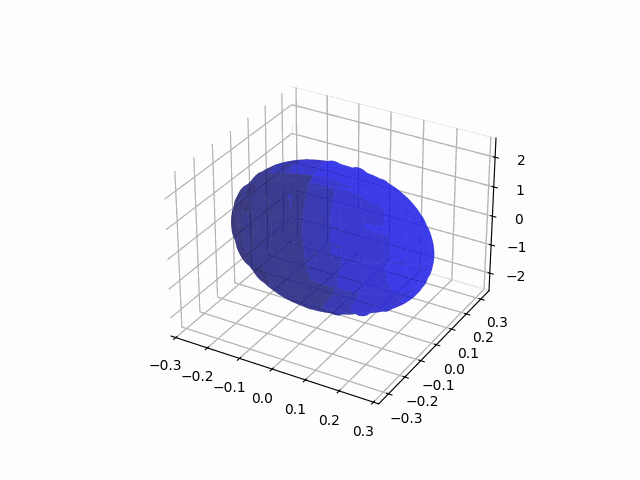

In [ ]:

animation = camera.animate()
# from IPython.display import HTML
# HTML(animation.to_html5_video())
animation.save("rotating_ring.gif", writer=PillowWriter(fps=120))
plt.show()
Image(data=open("rotating_ring.gif", "rb").read(), format='png')

## MNIST

In [ ]:
import jax
import jax.numpy as jnp
import flax.linen as nn
import optax
import tensorflow_datasets as tfds
from flax.training import train_state
from flax.training.common_utils import shard
from tensorboardX import SummaryWriter
import os
from jax_smi import initialise_tracking
initialise_tracking()

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import flax.jax_utils
import jax
import jax.numpy as jnp
import flax
from flax import linen as nn
from flax.training import train_state
import optax
from tqdm.auto import tqdm

import numpy as np
import plotly.graph_objects as go

class MNISTModel(nn.Module):
    @nn.compact
    def __call__(self, x):
        x = x.reshape(-1, 28 * 28)  # Flatten the input
        x = nn.Dense(features=512)(x)
        x = rcolu(x)
        x = nn.Dropout(rate=0.5, deterministic=True)(x)
        x = nn.Dense(features=10)(x)
        return x

def cross_entropy_loss(logits, labels):
    one_hot_labels = jax.nn.one_hot(labels, num_classes=10)
    return optax.softmax_cross_entropy(logits, one_hot_labels).mean()

def accuracy(logits, labels):
    predictions = jnp.argmax(logits, axis=-1)
    return jnp.mean(predictions == labels)

@jax.pmap
def train_step(state, batch):
    def loss_fn(params):
        logits = state.apply_fn({'params': params}, batch['image'])
        loss = cross_entropy_loss(logits, batch['label'])
        return loss, logits

    grad_fn = jax.value_and_grad(loss_fn, has_aux=True)
    (loss, logits), grads = grad_fn(state.params)
    state = state.apply_gradients(grads=grads)
    acc = accuracy(logits, batch['label'])
    return state, loss, acc

@jax.pmap
def eval_step(state, batch):
    logits = state.apply_fn({'params': state.params}, batch['image'])
    loss = cross_entropy_loss(logits, batch['label'])
    acc = accuracy(logits, batch['label'])
    return loss, acc

def prepare_data():
    ds_builder = tfds.builder('mnist')
    ds_builder.download_and_prepare()
    train_ds = tfds.as_numpy(tfds.load('mnist', split='train', batch_size=128, shuffle_files=True))
    test_ds = tfds.as_numpy(tfds.load('mnist', split='test', batch_size=128))
    return train_ds, test_ds

def create_train_state(rng, learning_rate, weight_decay=.01):
    model = MNISTModel()
    params = model.init(rng, jnp.ones([1, 28, 28, 1]))['params']
    
    def weight_decay_mask(params):
        return {k: 'bias' not in k and 'scale' not in k for k in params.keys()}

    tx = optax.adamw(learning_rate=learning_rate, weight_decay=weight_decay, mask=weight_decay_mask(params))
    return train_state.TrainState.create(apply_fn=model.apply, params=params, tx=tx)

def train_and_evaluate(num_epochs, learning_rate):
    # Create a SummaryWriter for TensorBoard
    writer = SummaryWriter(logdir=os.path.join('logs', 'mnist-adamw-dropout'))
    
    rng = jax.random.PRNGKey(0)
    rngs = {'params': rng}
    train_ds, test_ds = prepare_data()
    state = create_train_state(rngs, learning_rate)
     
    # Replicate state across devices
    state = jax.device_put_replicated(state, jax.local_devices())

    for epoch in range(num_epochs):
        # Training loop
        for batch in train_ds:
            batch = shard(batch)
            state, train_loss, train_acc = train_step(state, batch)

        # Evaluation loop
        test_loss, test_acc = 0, 0
        for batch in test_ds:
            batch = shard(batch)
            loss, acc = eval_step(state, batch)
            test_loss += loss.mean()
            test_acc += acc.mean()

        test_loss /= len(test_ds)
        test_acc /= len(test_ds)

        # Log the metrics to TensorBoard
        writer.add_scalar('Train Loss', train_loss.mean(), epoch)
        writer.add_scalar('Train Accuracy', train_acc.mean(), epoch)
        writer.add_scalar('Test Loss', test_loss, epoch)
        writer.add_scalar('Test Accuracy', test_acc, epoch)

        print(f'Epoch {epoch + 1}, Train Loss: {train_loss.mean():.4f}, Train Acc: {train_acc.mean():.4f}, '
              f'Test Loss: {test_loss:.4f}, Test Acc: {test_acc:.4f}')
    
    # Close the SummaryWriter
    writer.close()

if __name__ == "__main__":
    train_and_evaluate(num_epochs=100, learning_rate=0.001)


### RCoLU achieves 93\%
Epoch 10, Train Loss: 0.9947, Train Acc: 0.9896, Test Loss: 15.5107, Test Acc: 0.9337

### ReLU achieves 92\%
Epoch 10, Train Loss: 0.7823, Train Acc: 0.9688, Test Loss: 1.8226, Test Acc: 0.9242


## UNet-VAE PopArt-FashionMNIST

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np

import flax.linen as nn
import optax
from flax.training import train_state
from flax.training.common_utils import shard, shard_prng_key
import tensorflow as tf
import tensorflow_datasets as tfds
from tqdm import tqdm
# from tensorboardX import SummaryWriter
import os
import logging

tf.get_logger().setLevel(logging.ERROR)
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # 0 = all messages are logged, 1 = INFO messages are not printed, 2 = INFO and WARNING messages are not printed, 3 = INFO, WARNING, and ERROR messages are not printed

# Define UNet VAE architecture
class Encoder(nn.Module):
    latent_dim: int

    @nn.compact
    def __call__(self, x):
        # First convolutional layer
        x = nn.Conv(features=128, kernel_size=(3, 3), strides=(2, 2))(x)
        x = nn.LayerNorm()(x)
        x = nn.relu(x)
        x = nn.Conv(features=32, kernel_size=(3, 3), strides=(2, 2))(x)

        z_mean, z_log_var = jnp.split(x, [16], -1)
        
        return z_mean, z_log_var

class Decoder(nn.Module):
    latent_dim: int

    @nn.compact
    def __call__(self, z):
        x = nn.ConvTranspose(features=128, kernel_size=(3, 3), strides=(2, 2))(z)
        x = nn.LayerNorm()(x)
        x = nn.relu(x)
        
        # Second deconvolutional layer
        x = nn.ConvTranspose(features=3, kernel_size=(3, 3), strides=(2, 2))(x)
        
        return x

class UNetVAE(nn.Module):
    latent_dim: int = 32

    def setup(self):
        self.encoder = Encoder(latent_dim=self.latent_dim)
        self.decoder = Decoder(latent_dim=self.latent_dim)

    def __call__(self, x):
        z_mean, z_log_var = self.encoder(x)
        epsilon = jax.random.normal(self.make_rng('normal'), z_mean.shape)
        z = z_mean + jnp.exp(0.5 * z_log_var) * epsilon
        x_recon = self.decoder(z)
        return x_recon, z_mean, z_log_var

# Loss function
def loss_fn(params, apply_fn, batch, rng):
    x_recon, z_mean, z_log_var = apply_fn({'params': params}, batch, rngs={'normal': rng})
    recon_loss = jnp.mean(jnp.sum((x_recon - batch) ** 2, axis=(1, 2, 3)))
    kl_loss = -0.5 * jnp.mean(jnp.sum(1 + z_log_var - jnp.square(z_mean) - jnp.exp(z_log_var), axis=-1))
    return recon_loss + kl_loss, recon_loss, kl_loss

# Training step
@jax.pmap
def train_step(state, batch, rng):
    def grad_fn(params):
        loss, recon_loss, kl_loss = loss_fn(params, state.apply_fn, batch, rng)
        return loss, (loss, recon_loss, kl_loss)

    grad_fn = jax.value_and_grad(grad_fn, has_aux=True)
    (_, (loss, recon_loss, kl_loss)), grads = grad_fn(state.params)
    state = state.apply_gradients(grads=grads)
    return state, loss, recon_loss, kl_loss


# Prepare dataset for Fashion MNIST with coloring
def preprocess_fn(data):
    image = tf.image.convert_image_dtype(data['image'], tf.float32)
    image = tf.image.resize(image, [64, 64])  # Resizing to 64x64 if needed
    image = tf.image.grayscale_to_rgb(image)  # Convert grayscale to RGB
    return image

def load_dataset(split, batch_size):
    ds = tfds.load('fashion_mnist', split=split, shuffle_files=True)
    ds = ds.map(preprocess_fn, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds

# Initialize model and optimizer
def create_train_state(rng, learning_rate, latent_dim):
    model = UNetVAE(latent_dim=latent_dim)
    params = model.init(rng, jnp.ones([1, 64, 64, 3]))['params']
    tx = optax.adam(learning_rate)
    return train_state.TrainState.create(apply_fn=model.apply, params=params, tx=tx)

# Main training loop
def train_model(epochs, batch_size, learning_rate, latent_dim):
    rng = jax.random.PRNGKey(0)
    rng, init_rng = jax.random.split(rng)

    state = create_train_state(init_rng, learning_rate, latent_dim)
    state = jax.device_put_replicated(state, jax.local_devices())

    train_ds = load_dataset('train', batch_size)
    val_ds = load_dataset('test', batch_size)

    # Create a SummaryWriter to log data for Tensorboard
    # writer = SummaryWriter(logdir="logs/UNetVAE")

    pbar = tqdm(range(epochs), total=len(train_ds))
    global_step = 0
    for epoch in pbar:
        # Training loop
        train_iter = iter(train_ds)
        val_iter = iter(val_ds)
        for batch in train_iter:
            rng, step_rng = jax.random.split(rng)
            shard_rngs = shard_prng_key(step_rng)
            batch = jax.numpy.array(batch)
            if batch.shape[0] != batch_size:
                continue
            colors = sample_points_on_circle(rng, batch_size)[:,None,None,:]
            batch = batch * colors
            batch = shard(batch)
            state, loss, recon_loss, kl_loss = train_step(state, batch, shard_rngs)
            global_step += 1
            
        pbar.set_description(f'loss={jax.device_get(loss).mean()}')

        pbar.close()

        # Validation loop
        val_losses = []
        for val_batch in val_iter:
            val_batch = jax.numpy.array(val_batch)
            if val_batch.shape[0] % jax.device_count() != 0:
                continue
            val_batch = shard(val_batch)
            _, val_loss, _, _ = train_step(state, val_batch, shard_rngs)
            val_losses.append(jax.device_get(val_loss).mean())
        
        avg_val_loss = np.mean(val_losses)
        # print(f"Validation Loss after epoch {epoch + 1}: {avg_val_loss}")

    return jax.device_get(flax.jax_utils.unreplicate(state.params))

# Set parameters and train
params = train_model(epochs=100, batch_size=512, learning_rate=1e-4, latent_dim=32)
jax.tree.map(lambda x:x.shape,params)

  0%|          | 0/118 [00:00<?, ?it/s]

2024-07-03 16:46:33.348771: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 1 completed
Validation Loss after epoch 1: 961.79345703125


2024-07-03 16:46:38.921883: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


  0%|          | 0/118 [00:00<?, ?it/s]

2024-07-03 16:46:45.940592: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 2 completed
Validation Loss after epoch 2: 653.9925537109375


2024-07-03 16:46:47.026869: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


  0%|          | 0/118 [00:00<?, ?it/s]

2024-07-03 16:46:54.086501: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 3 completed
Validation Loss after epoch 3: 551.2620849609375


2024-07-03 16:46:55.171602: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


  0%|          | 0/118 [00:00<?, ?it/s]

2024-07-03 16:47:02.339296: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 4 completed
Validation Loss after epoch 4: 502.96661376953125


2024-07-03 16:47:03.452529: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


  0%|          | 0/118 [00:00<?, ?it/s]

Epoch 5 completed


2024-07-03 16:47:10.495810: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Validation Loss after epoch 5: 469.4622497558594


2024-07-03 16:47:11.490384: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


  0%|          | 0/118 [00:00<?, ?it/s]

2024-07-03 16:47:18.288425: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch 6 completed
Validation Loss after epoch 6: 443.8401794433594


2024-07-03 16:47:19.349786: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


  0%|          | 0/118 [00:00<?, ?it/s]

KeyboardInterrupt: 

2024-07-03 16:47:35.045321: W tensorflow/core/kernels/data/cache_dataset_ops.cc:858] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-07-03 16:47:35.046052: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


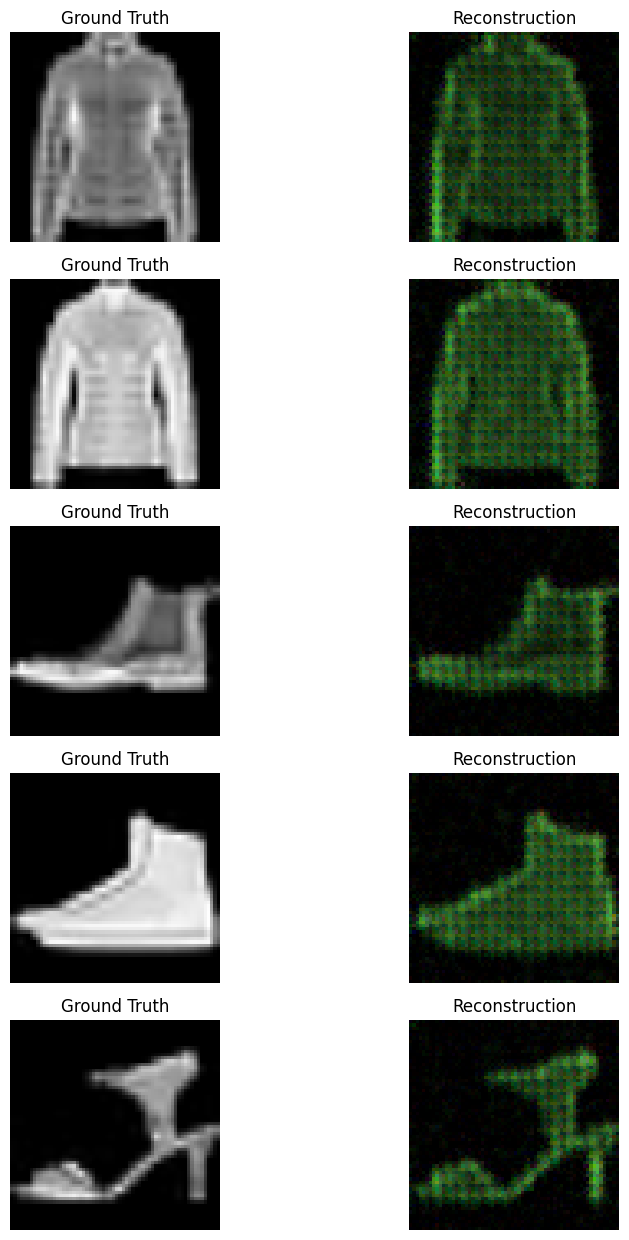

In [ ]:
import matplotlib.pyplot as plt

def visualize_reconstructions(params, dataset, num_images=5):
    # Get a batch of images
    for batch in dataset.take(1):
        images = batch

    # Select a subset of images for visualization
    images_subset = images[:num_images]

    # Perform reconstruction
    model = UNetVAE(latent_dim=32)
    rng = jax.random.PRNGKey(0)  # Replace with your model's RNG if needed
    reconstructions, _, _ = model.apply({'params': params}, images_subset, rngs={'normal': rng})

    # Plot the ground truth and reconstructed images
    fig, axes = plt.subplots(num_images, 2, figsize=(10, num_images * 2.5))
    for i in range(num_images):
        # Ground truth
        axes[i, 0].imshow(images_subset[i])
        axes[i, 0].set_title("Ground Truth")
        axes[i, 0].axis('off')
        
        # Reconstruction
        axes[i, 1].imshow(reconstructions[i])
        axes[i, 1].set_title("Reconstruction")
        axes[i, 1].axis('off')

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `model` is your trained UNet VAE model and `model_params` are the trained parameters
# `test_dataset` is the dataset containing the test images
batch_size = 64
test_dataset = load_dataset('test', batch_size)
visualize_reconstructions(params, test_dataset)
